# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
import scipy.stats as sts
from pprint import pprint
# Import API key
from config import openwather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#start a counter for city #
city_count = 0

# start empty lists to store data for our DF
City_ID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [5]:
# use for loop to cycle thru API call and gather raw data
for city in cities:
    # create a try/except for cities not found on open weather api
    try:
        # call api inside of our try/except
        response = rq.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={openwather_api_key}').json()
        
        # add 1 to count for each iteration
        city_count += 1
        
        # append data to our empty lists
        City_ID.append(response['id'])
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        
        # Include a print log of each city as it's being processed
        #print(f'City Name: {city} - City Number: {city_count}')
        #print()
        
    except:
        # print value if not found
        print('City not Found, skipping...')

City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skip

### DataFrame
* Convert Raw Data to a DataFrame
* Display the DataFrame
    * Headers should be: 'City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat','Lng', 'Max_Temp', 'Wind_Speed'

In [6]:
lst_of_list = [
               City_ID,
               City,
               Cloudiness,
               Country,
               Date,
               Humidity,
               Lat,
               Lng,
               Max_Temp,
               Wind_Speed
              ]

city_df = pd.DataFrame(lst_of_list) 
city_df = city_df.transpose()
city_df.columns = ['City_ID', 'City', 'Cloudiness',
                   'Country', 'Date', 'Humidity',
                   'Lat','Lng', 'Max_Temp', 'Wind_Speed']

In [7]:
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,1645133,Dumai,100,ID,1612062421,54,1.6833,101.45,85.3,3.42
1,3579925,St. George's,20,GD,1612062421,83,12.0564,-61.7485,78.8,20.71
2,6201424,Mataura,98,NZ,1612061858,35,-46.1927,168.864,73.81,3.65
3,2126199,Cherskiy,0,RU,1612061856,83,68.75,161.3,-35.21,2.01
4,2173911,Broken Hill,34,AU,1612062402,28,-31.95,141.433,84.2,14.97
...,...,...,...,...,...,...,...,...,...,...
552,3868633,Vallenar,0,CL,1612062318,64,-28.5708,-70.7581,63.9,0.83
553,2192362,Christchurch,20,NZ,1612062280,63,-43.5333,172.633,66.2,23.02
554,1052944,Angoche,100,MZ,1612062479,87,-16.2325,39.9086,77.14,7.2
555,2154826,Wonthaggi,36,AU,1612062479,63,-38.6044,145.591,78.01,8.52


## Output File (CSV)
* Export the city data DataFrame into a .csv file

In [8]:
city_df.to_csv('../output_data/cities2.csv', index=False)
pd.read_csv('../output_data/cities2.csv')

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,1645133,Dumai,100,ID,1612062421,54,1.6833,101.4500,85.30,3.42
1,3579925,St. George's,20,GD,1612062421,83,12.0564,-61.7485,78.80,20.71
2,6201424,Mataura,98,NZ,1612061858,35,-46.1927,168.8643,73.81,3.65
3,2126199,Cherskiy,0,RU,1612061856,83,68.7500,161.3000,-35.21,2.01
4,2173911,Broken Hill,34,AU,1612062402,28,-31.9500,141.4333,84.20,14.97
...,...,...,...,...,...,...,...,...,...,...
552,3868633,Vallenar,0,CL,1612062318,64,-28.5708,-70.7581,63.90,0.83
553,2192362,Christchurch,20,NZ,1612062280,63,-43.5333,172.6333,66.20,23.02
554,1052944,Angoche,100,MZ,1612062479,87,-16.2325,39.9086,77.14,7.20
555,2154826,Wonthaggi,36,AU,1612062479,63,-38.6044,145.5913,78.01,8.52


## Inspect the data
* Remove the cities where the humidity > 100%.
    * Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
index = city_df.loc[city_df['Humidity']>100].index
index
# No values returned with humidity > 100

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(index, inplace=False)
clean_city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,1645133,Dumai,100,ID,1612062421,54,1.6833,101.45,85.3,3.42
1,3579925,St. George's,20,GD,1612062421,83,12.0564,-61.7485,78.8,20.71
2,6201424,Mataura,98,NZ,1612061858,35,-46.1927,168.864,73.81,3.65
3,2126199,Cherskiy,0,RU,1612061856,83,68.75,161.3,-35.21,2.01
4,2173911,Broken Hill,34,AU,1612062402,28,-31.95,141.433,84.2,14.97
...,...,...,...,...,...,...,...,...,...,...
552,3868633,Vallenar,0,CL,1612062318,64,-28.5708,-70.7581,63.9,0.83
553,2192362,Christchurch,20,NZ,1612062280,63,-43.5333,172.633,66.2,23.02
554,1052944,Angoche,100,MZ,1612062479,87,-16.2325,39.9086,77.14,7.2
555,2154826,Wonthaggi,36,AU,1612062479,63,-38.6044,145.591,78.01,8.52


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.
    * Temperature (F) vs. Latitude
    * Humidity (%) vs. Latitude
    * Cloudiness (%) vs. Latitude
    * Wind Speed (mph) vs. Latitude
* After each plot, add a sentence or two explaining what the code is analyzing

## Latitude vs. Temperature Plot

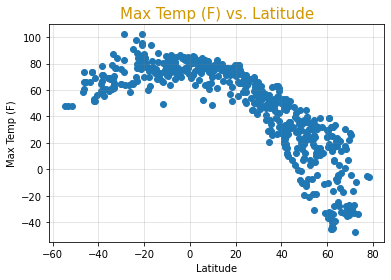

In [11]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Max_Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
plt.show()

## Latitude vs. Humidity Plot

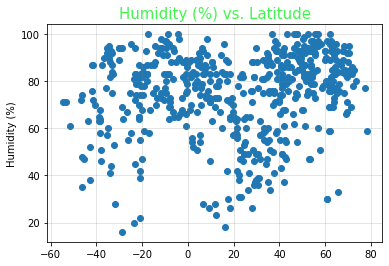

In [12]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Humidity'])
plt.ylabel('Humidity (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
plt.show()

## Latitude vs. Cloudiness Plot

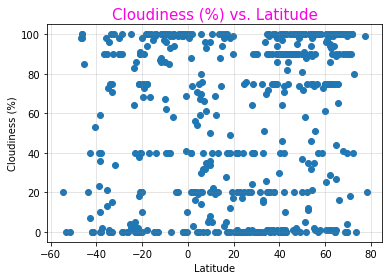

In [13]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
plt.show()

## Latitude vs. Wind Speed Plot

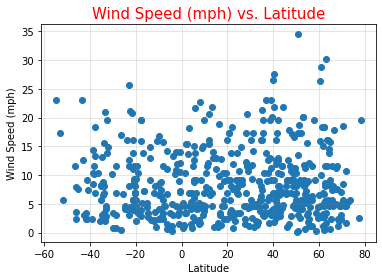

In [14]:
plt.scatter(clean_city_df['Lat'],clean_city_df['Wind_Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
plt.show()

## Linear Regression
* The second requirement is to run linear regression on each relationship. 
* Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* After each pair of plots, take the time to explain what the linear regression is modeling. 
    * For example, describe any relationships you notice and any other analysis you may have.

In [15]:
# create new DFs for Northern Hemisphere and Southern Hemisphere
NH_city_df = clean_city_df.loc[clean_city_df['Lat']>=0]
SH_city_df = clean_city_df.loc[clean_city_df['Lat']<0]
SH_city_df['Lat']

2     -46.1927
4       -31.95
7     -20.4081
10    -30.1811
13      -19.55
        ...   
552   -28.5708
553   -43.5333
554   -16.2325
555   -38.6044
556    -0.9516
Name: Lat, Length: 163, dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

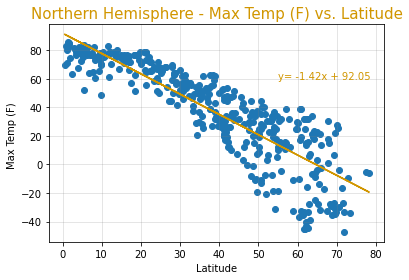

Rval = -0.8658251087665353


In [16]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Max_Temp'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Max_Temp'])
plt.plot(NH_city_df['Lat'], regress_line, color='#d19600')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (55,60), color='#d19600')
#plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F) ')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

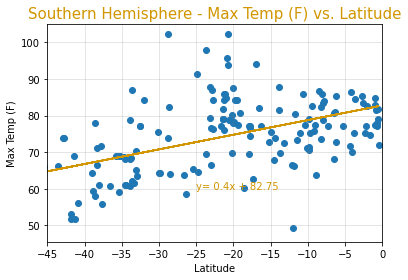

Rval = 0.514981212558955


In [17]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Max_Temp'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Max_Temp'])
plt.plot(SH_city_df['Lat'], regress_line, color='#d19600')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-25,60), color='#d19600')
plt.xlim(-45, 0)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

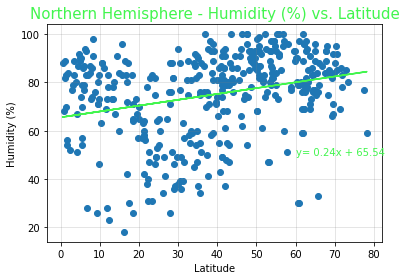

Rval = 0.27327736540261255


In [18]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Humidity'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Humidity'])
plt.plot(NH_city_df['Lat'], regress_line, color='#42f54e')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (60,50), color='#42f54e')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

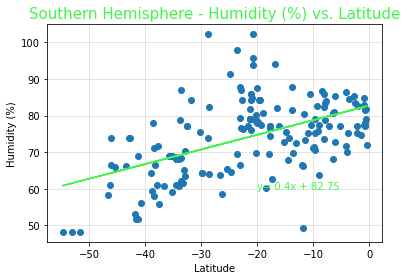

Rval = 0.514981212558955


In [19]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Max_Temp'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Max_Temp'])
plt.plot(SH_city_df['Lat'], regress_line, color='#42f54e')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-20,60), color='#42f54e')
#plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

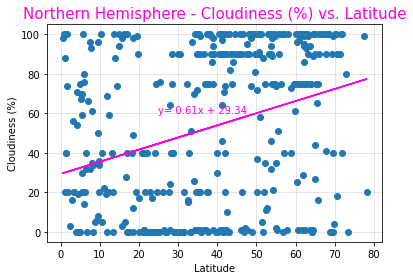

Rval = 0.3104769261374437


In [20]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Cloudiness'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Cloudiness'])
plt.plot(NH_city_df['Lat'], regress_line, color='#fa00e3')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (25,60), color='#fa00e3')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

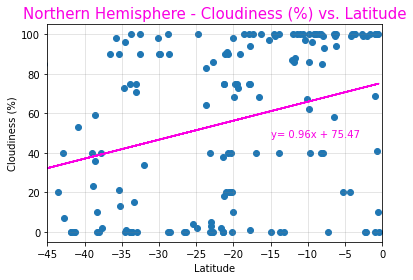

Rval = 0.3127105658578015


In [21]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Cloudiness'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'], SH_city_df['Cloudiness'])
plt.plot(SH_city_df['Lat'], regress_line, color='#fa00e3')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-15,48), color='#fa00e3')
plt.xlim(-45, 0)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

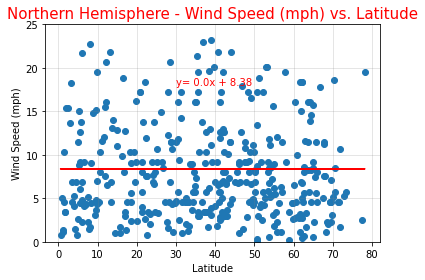

Rval = 0.0003580404990482565


In [22]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Wind_Speed'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Wind_Speed'])
plt.plot(NH_city_df['Lat'], regress_line, color='red')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (30,18), color='red')
plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

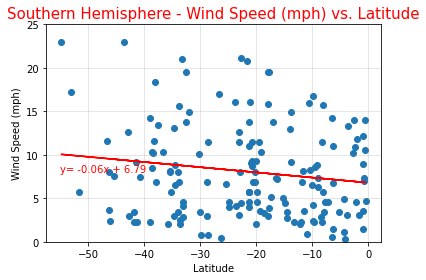

Rval = -0.14720830884980865


In [23]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Wind_Speed'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Wind_Speed'])
plt.plot(SH_city_df['Lat'], regress_line, color='red')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-55,8), color='red')
plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
plt.show()
print(f'Rval = {rval}')